In [1]:
from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting
import matplotlib.pyplot as plt
from ema_workbench.analysis import feature_scoring
import seaborn as sns
from ema_workbench.analysis import prim
import pandas as pd
from SALib.analyze import sobol
from ema_workbench import Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import Model, RealParameter, ScalarOutcome
from ema_workbench import MultiprocessingEvaluator, ema_logging

from ema_workbench import save_results
import numpy as np

# Read in data

In [18]:
bounded_1_to_2_experiments2222, bounded_1_to_2_outcomes2222 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start1_to_2_seed2222.gz')
bounded_1_to_2_experiments3333, bounded_1_to_2_outcomes3333 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start1_to_2_seed3333.gz')
bounded_1_to_2_experiments4444, bounded_1_to_2_outcomes4444 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start1_to_2_seed4444.gz')
bounded_1_to_2_experiments5555, bounded_1_to_2_outcomes5555 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start1_to_2_seed5555.gz')
bounded_1_to_2_experiments6666, bounded_1_to_2_outcomes6666 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start1_to_2_seed6666.gz')

bounded_2_to_1_experiments2222, bounded_2_to_1_outcomes2222 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start2_to_1_seed2222.gz')
bounded_2_to_1_experiments3333, bounded_2_to_1_outcomes3333 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start2_to_1_seed3333.gz')
bounded_2_to_1_experiments4444, bounded_2_to_1_outcomes4444 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start2_to_1_seed4444.gz')
bounded_2_to_1_experiments5555, bounded_2_to_1_outcomes5555 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start2_to_1_seed5555.gz')
bounded_2_to_1_experiments6666, bounded_2_to_1_outcomes6666 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start2_to_1_seed6666.gz')

In [19]:
bounded_1_to_2_experiments2222.keys()

Index(['num_of_paths', 'strategy_change_percentage', 'scenario', 'policy',
       'model'],
      dtype='object')

In [20]:
bounded_1_to_2_outcomes2222.keys()

dict_keys(['continuity_mean', 'continuity_vars', 'connectivity_mean', 'connectivity_vars', 'node_frequency_mean', 'node_frequency_var'])

In [21]:
bounded_1_to_2_outcomes2222['continuity_var'] = bounded_1_to_2_outcomes2222['continuity_vars']
bounded_1_to_2_outcomes3333['continuity_var'] = bounded_1_to_2_outcomes3333['continuity_vars']
bounded_1_to_2_outcomes4444['continuity_var'] = bounded_1_to_2_outcomes4444['continuity_vars']
bounded_1_to_2_outcomes5555['continuity_var'] = bounded_1_to_2_outcomes5555['continuity_vars']
bounded_1_to_2_outcomes6666['continuity_var'] = bounded_1_to_2_outcomes6666['continuity_vars']

bounded_2_to_1_outcomes2222['continuity_var'] = bounded_2_to_1_outcomes2222['continuity_vars']
bounded_2_to_1_outcomes3333['continuity_var'] = bounded_2_to_1_outcomes3333['continuity_vars']
bounded_2_to_1_outcomes4444['continuity_var'] = bounded_1_to_2_outcomes4444['continuity_vars']
bounded_2_to_1_outcomes5555['continuity_var'] = bounded_2_to_1_outcomes5555['continuity_vars']
bounded_2_to_1_outcomes6666['continuity_var'] = bounded_2_to_1_outcomes6666['continuity_vars']

bounded_1_to_2_outcomes2222['connectivity_var'] = bounded_1_to_2_outcomes2222['connectivity_vars']
bounded_1_to_2_outcomes3333['connectivity_var'] = bounded_1_to_2_outcomes3333['connectivity_vars']
bounded_1_to_2_outcomes4444['connectivity_var'] = bounded_1_to_2_outcomes4444['connectivity_vars']
bounded_1_to_2_outcomes5555['connectivity_var'] = bounded_1_to_2_outcomes5555['connectivity_vars']
bounded_1_to_2_outcomes6666['connectivity_var'] = bounded_1_to_2_outcomes6666['connectivity_vars']

bounded_2_to_1_outcomes2222['connectivity_var'] = bounded_2_to_1_outcomes2222['connectivity_vars']
bounded_2_to_1_outcomes3333['connectivity_var'] = bounded_2_to_1_outcomes3333['connectivity_vars']
bounded_2_to_1_outcomes4444['connectivity_var'] = bounded_2_to_1_outcomes4444['connectivity_vars']
bounded_2_to_1_outcomes5555['connectivity_var'] = bounded_2_to_1_outcomes5555['connectivity_vars']
bounded_2_to_1_outcomes6666['connectivity_var'] = bounded_2_to_1_outcomes6666['connectivity_vars']

In [22]:
bounded_1_to_2_outcomes2222.pop('continuity_vars')
bounded_1_to_2_outcomes3333.pop('continuity_vars')
bounded_1_to_2_outcomes4444.pop('continuity_vars')
bounded_1_to_2_outcomes5555.pop('continuity_vars')
bounded_1_to_2_outcomes6666.pop('continuity_vars')

bounded_2_to_1_outcomes2222.pop('continuity_vars')
bounded_2_to_1_outcomes3333.pop('continuity_vars')
bounded_2_to_1_outcomes4444.pop('continuity_vars')
bounded_2_to_1_outcomes5555.pop('continuity_vars')
bounded_2_to_1_outcomes6666.pop('continuity_vars')

bounded_1_to_2_outcomes2222.pop('connectivity_vars')
bounded_1_to_2_outcomes3333.pop('connectivity_vars')
bounded_1_to_2_outcomes4444.pop('connectivity_vars')
bounded_1_to_2_outcomes5555.pop('connectivity_vars')
bounded_1_to_2_outcomes6666.pop('connectivity_vars')

bounded_2_to_1_outcomes2222.pop('connectivity_vars')
bounded_2_to_1_outcomes3333.pop('connectivity_vars')
bounded_2_to_1_outcomes4444.pop('connectivity_vars')
bounded_2_to_1_outcomes5555.pop('connectivity_vars')
bounded_2_to_1_outcomes6666.pop('connectivity_vars')

array([0.7547233 , 0.80392343, 0.82757508, 0.71616424, 0.69678729,
       0.69538941, 0.71931229, 0.93464213, 0.85569414, 0.70075209,
       0.70075209, 0.86770824, 0.88232515, 0.71931229, 0.71641652,
       0.71715594, 0.70420962, 0.82757508, 0.71185349, 0.7547233 ,
       0.77303476, 0.86770824, 0.80392343, 0.71931229, 0.85569414,
       0.7049722 , 0.82757508, 0.85569414, 0.69538941, 0.85569414,
       0.80392343, 0.7049722 , 0.69538941, 0.69910733, 0.69910733,
       0.71616424, 0.70075209, 0.73527445, 0.7445889 , 0.70075209,
       0.71641652, 0.71641652, 0.69678729, 0.88232515, 0.7547233 ,
       0.86770824, 0.71715594, 0.82757508, 0.69678729, 0.71736721,
       0.71616424, 0.71736721, 0.71715594, 0.77303476, 0.82757508,
       0.69910733, 0.69910733, 0.71641652, 0.69538941, 0.71185349,
       0.71715594, 0.7445889 , 0.73527445, 0.80392343, 0.86770824,
       0.93464213, 0.71736721, 0.71641652, 0.77303476, 0.7445889 ,
       0.77303476, 0.72843648, 0.69910733, 0.70420962, 0.70497

In [30]:
outcomes_change = bounded_1_to_2_outcomes2222
bounded_1_to_2_outcomes2222 = {}
bounded_1_to_2_outcomes2222["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_1_to_2_outcomes2222["connectivity_var"] = outcomes_change['connectivity_var']
bounded_1_to_2_outcomes2222["continuity_mean"] = outcomes_change['continuity_mean']
bounded_1_to_2_outcomes2222["continuity_var"] = outcomes_change['continuity_var']
bounded_1_to_2_outcomes2222["node_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_1_to_2_outcomes2222["node_frequency_var"] = outcomes_change['node_frequency_var']

In [32]:
outcomes_change = bounded_1_to_2_outcomes3333
bounded_1_to_2_outcomes3333 = {}
bounded_1_to_2_outcomes3333["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_1_to_2_outcomes3333["connectivity_var"] = outcomes_change['connectivity_var']
bounded_1_to_2_outcomes3333["continuity_mean"] = outcomes_change['continuity_mean']
bounded_1_to_2_outcomes3333["continuity_var"] = outcomes_change['continuity_var']
bounded_1_to_2_outcomes3333["node_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_1_to_2_outcomes3333["node_frequency_var"] = outcomes_change['node_frequency_var']

In [33]:
outcomes_change = bounded_1_to_2_outcomes4444
bounded_1_to_2_outcomes4444 = {}
bounded_1_to_2_outcomes4444["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_1_to_2_outcomes4444["connectivity_var"] = outcomes_change['connectivity_var']
bounded_1_to_2_outcomes4444["continuity_mean"] = outcomes_change['continuity_mean']
bounded_1_to_2_outcomes4444["continuity_var"] = outcomes_change['continuity_var']
bounded_1_to_2_outcomes4444["node_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_1_to_2_outcomes4444["node_frequency_var"] = outcomes_change['node_frequency_var']

In [34]:
outcomes_change = bounded_1_to_2_outcomes5555
bounded_1_to_2_outcomes5555 = {}
bounded_1_to_2_outcomes5555["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_1_to_2_outcomes5555["connectivity_var"] = outcomes_change['connectivity_var']
bounded_1_to_2_outcomes5555["continuity_mean"] = outcomes_change['continuity_mean']
bounded_1_to_2_outcomes5555["continuity_var"] = outcomes_change['continuity_var']
bounded_1_to_2_outcomes5555["node_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_1_to_2_outcomes5555["node_frequency_var"] = outcomes_change['node_frequency_var']

In [35]:
outcomes_change = bounded_1_to_2_outcomes6666
bounded_1_to_2_outcomes6666 = {}
bounded_1_to_2_outcomes6666["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_1_to_2_outcomes6666["connectivity_var"] = outcomes_change['connectivity_var']
bounded_1_to_2_outcomes6666["continuity_mean"] = outcomes_change['continuity_mean']
bounded_1_to_2_outcomes6666["continuity_var"] = outcomes_change['continuity_var']
bounded_1_to_2_outcomes6666["node_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_1_to_2_outcomes6666["node_frequency_var"] = outcomes_change['node_frequency_var']

In [36]:
outcomes_change = bounded_2_to_1_outcomes2222
bounded_2_to_1_outcomes2222 = {}
bounded_2_to_1_outcomes2222["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_2_to_1_outcomes2222["connectivity_var"] = outcomes_change['connectivity_var']
bounded_2_to_1_outcomes2222["continuity_mean"] = outcomes_change['continuity_mean']
bounded_2_to_1_outcomes2222["continuity_var"] = outcomes_change['continuity_var']
bounded_2_to_1_outcomes2222["node_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_2_to_1_outcomes2222["node_frequency_var"] = outcomes_change['node_frequency_var']

In [37]:
outcomes_change = bounded_2_to_1_outcomes3333
bounded_2_to_1_outcomes3333 = {}
bounded_2_to_1_outcomes3333["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_2_to_1_outcomes3333["connectivity_var"] = outcomes_change['connectivity_var']
bounded_2_to_1_outcomes3333["continuity_mean"] = outcomes_change['continuity_mean']
bounded_2_to_1_outcomes3333["continuity_var"] = outcomes_change['continuity_var']
bounded_2_to_1_outcomes3333["node_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_2_to_1_outcomes3333["node_frequency_var"] = outcomes_change['node_frequency_var']

In [38]:
outcomes_change = bounded_2_to_1_outcomes4444
bounded_2_to_1_outcomes4444 = {}
bounded_2_to_1_outcomes4444["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_2_to_1_outcomes4444["connectivity_var"] = outcomes_change['connectivity_var']
bounded_2_to_1_outcomes4444["continuity_mean"] = outcomes_change['continuity_mean']
bounded_2_to_1_outcomes4444["continuity_var"] = outcomes_change['continuity_var']
bounded_2_to_1_outcomes4444["node_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_2_to_1_outcomes4444["node_frequency_var"] = outcomes_change['node_frequency_var']

In [39]:
outcomes_change = bounded_2_to_1_outcomes5555
bounded_2_to_1_outcomes5555 = {}
bounded_2_to_1_outcomes5555["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_2_to_1_outcomes5555["connectivity_var"] = outcomes_change['connectivity_var']
bounded_2_to_1_outcomes5555["continuity_mean"] = outcomes_change['continuity_mean']
bounded_2_to_1_outcomes5555["continuity_var"] = outcomes_change['continuity_var']
bounded_2_to_1_outcomes5555["node_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_2_to_1_outcomes5555["node_frequency_var"] = outcomes_change['node_frequency_var']

In [40]:
outcomes_change = bounded_2_to_1_outcomes6666
bounded_2_to_1_outcomes6666 = {}
bounded_2_to_1_outcomes6666["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_2_to_1_outcomes6666["connectivity_var"] = outcomes_change['connectivity_var']
bounded_2_to_1_outcomes6666["continuity_mean"] = outcomes_change['continuity_mean']
bounded_2_to_1_outcomes6666["continuity_var"] = outcomes_change['continuity_var']
bounded_2_to_1_outcomes6666["node_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_2_to_1_outcomes6666["node_frequency_var"] = outcomes_change['node_frequency_var']

## Code for making histograms

In [44]:
def make_histogram_full(outcome):
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    histogram = pd.Series(outcome.get("continuity_mean"))
    axs[0, 0].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[0, 0].set_title("Continuity_mean")
    axs[0, 0].set_xlabel('Value')
    axs[0, 0].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("continuity_var"))
    axs[0, 1].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[0, 1].set_title("Continuity_vars")
    axs[0, 1].set_xlabel('Value')
    axs[0, 1].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("connectivity_mean"))
    axs[1, 0].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[1, 0].set_title("Connectivity_mean")
    axs[1, 0].set_xlabel('Value')
    axs[1, 0].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("connectivity_var"))
    axs[1, 1].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[1, 1].set_title("Connectivity_vars")
    axs[1, 1].set_xlabel('Value')
    axs[1, 1].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("node_frequency_mean"))
    axs[2, 0].hist(histogram, bins=20, rwidth=0.9,
                          color='#607c8e')
    axs[2, 0].set_title("node_frequency_mean")
    axs[2, 0].set_xlabel('Value')
    axs[2, 0].set_ylabel('Frequency')


    histogram = pd.Series(outcome.get("node_frequency_var"))
    axs[2, 1].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[2, 1].set_title("node_frequency_vars")
    axs[2, 1].set_xlabel('Value')
    axs[2, 1].set_ylabel('Frequency')

# strategy 1 to 2

## seed 2222

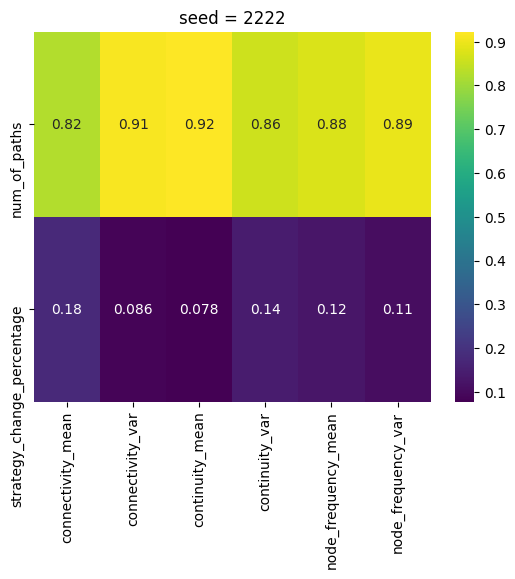

In [109]:
fs = feature_scoring.get_feature_scores_all(bounded_1_to_2_experiments2222[['num_of_paths', 'strategy_change_percentage']], bounded_1_to_2_outcomes2222)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 2222")
plt.savefig('bounded_ETRF_1_to_2_seed2222.png', bbox_inches='tight')

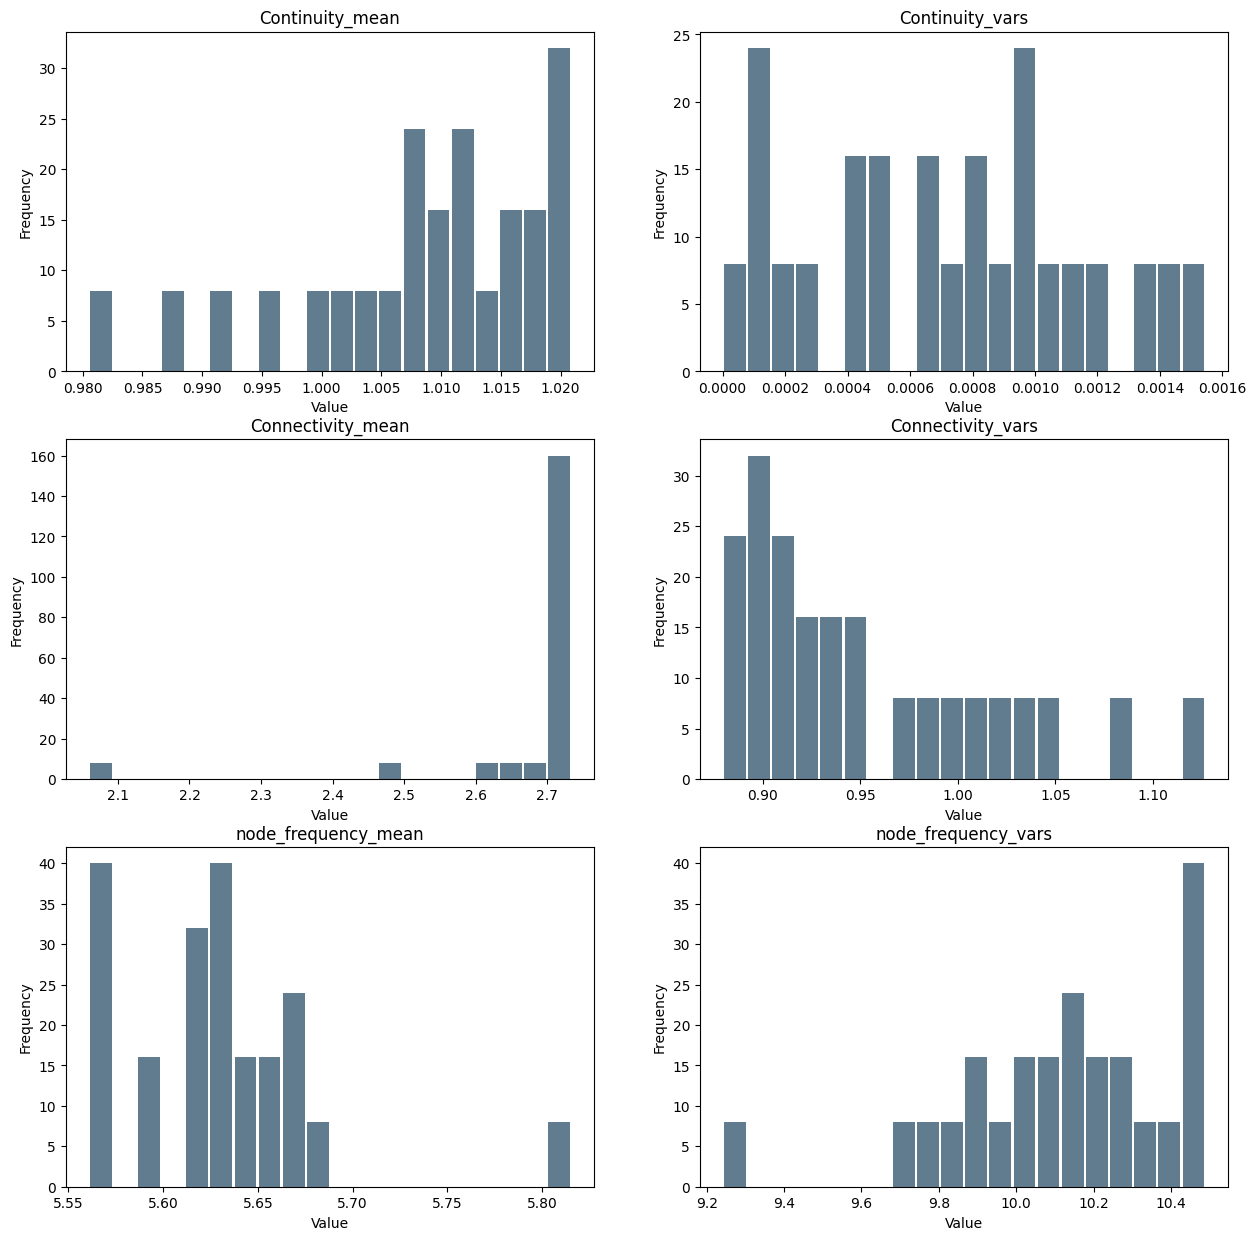

In [45]:
make_histogram_full(bounded_1_to_2_outcomes2222)

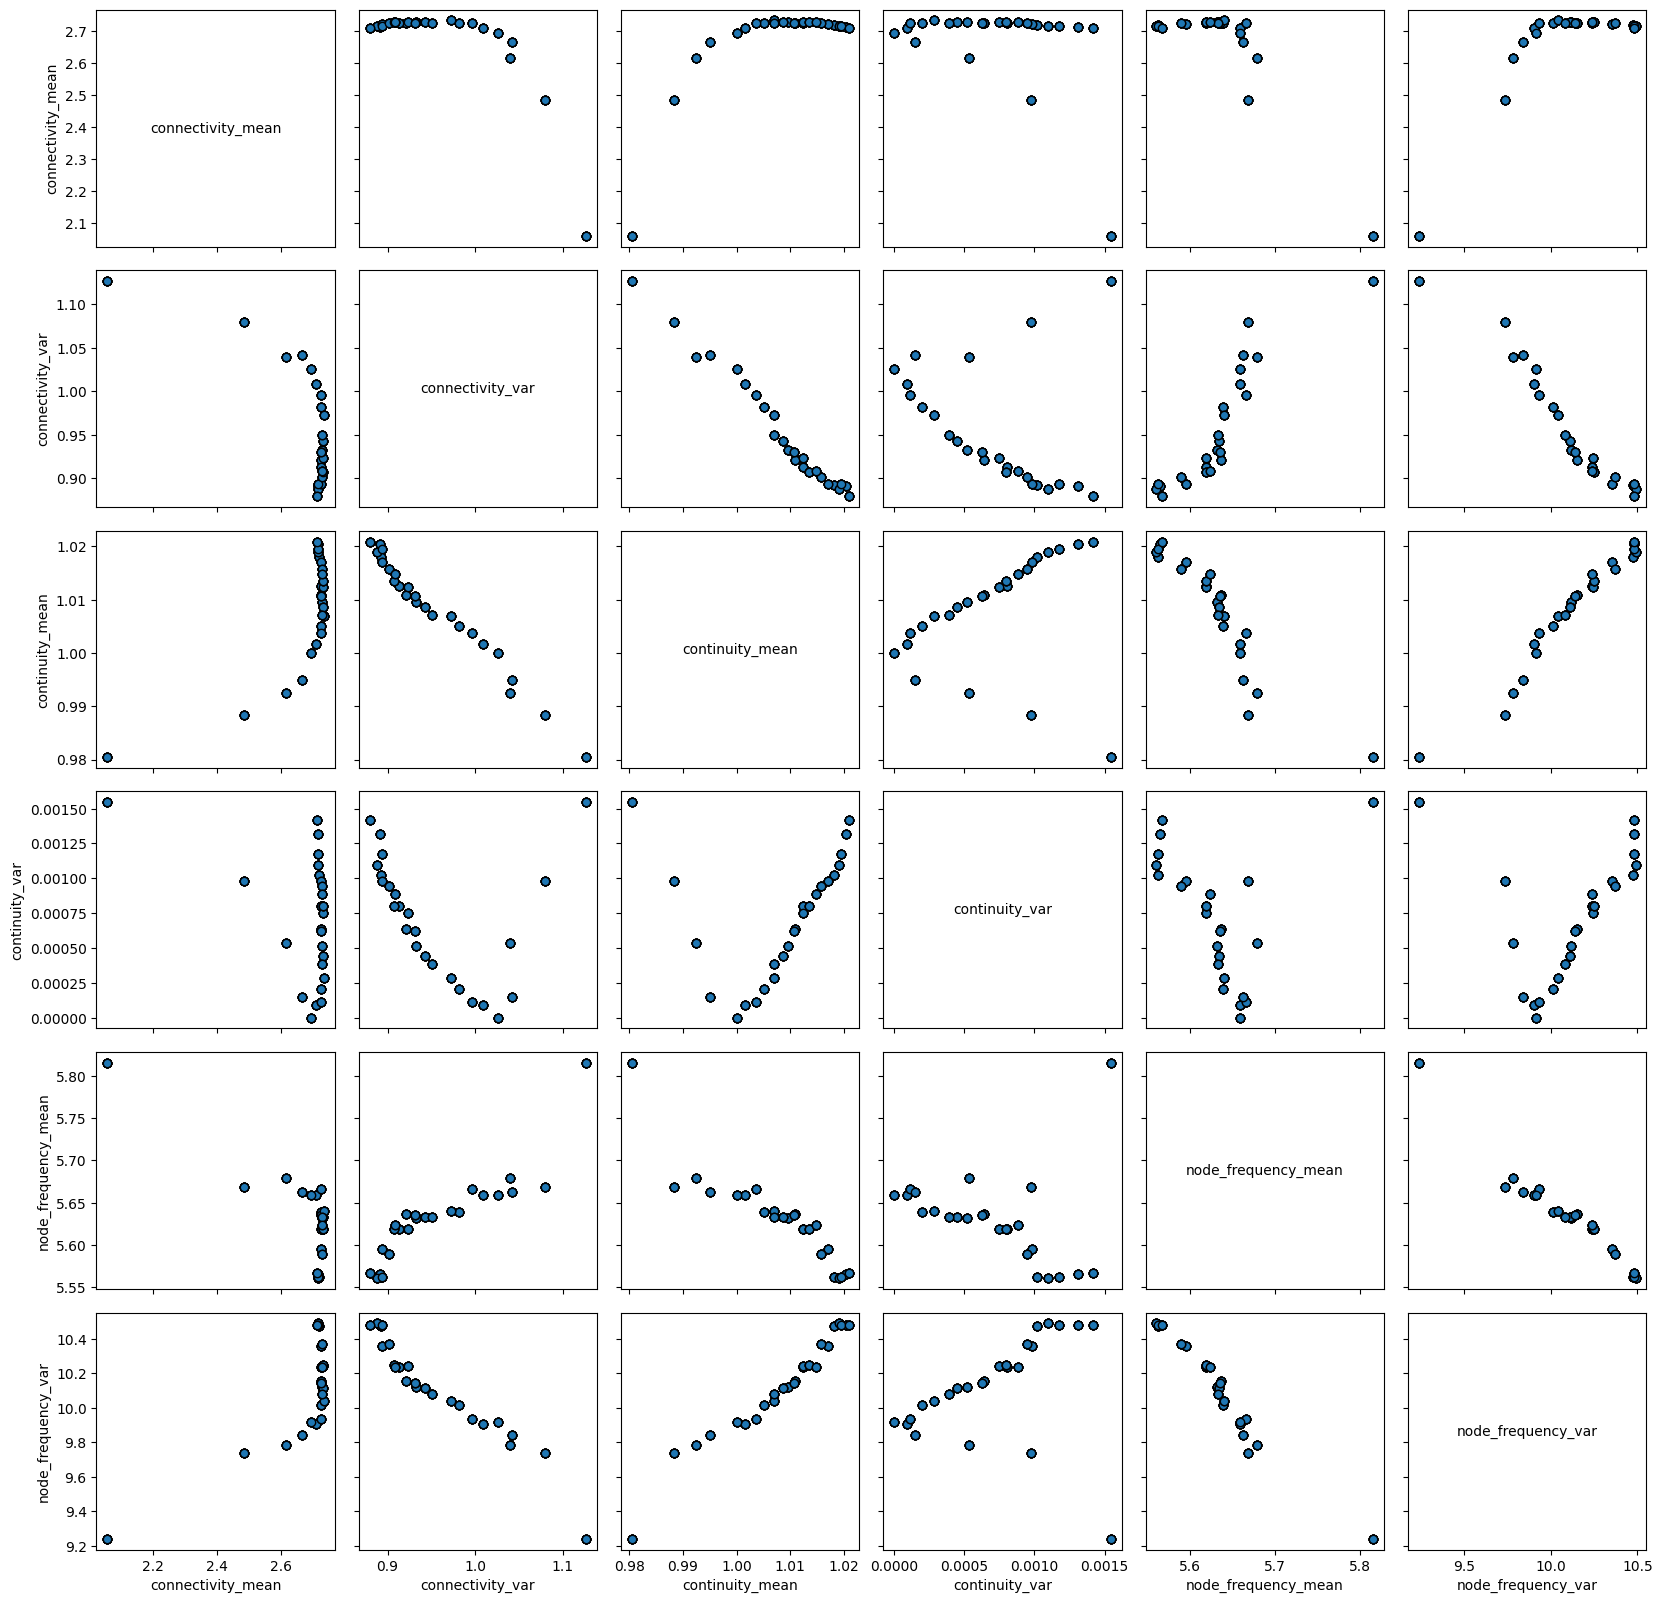

In [46]:
fig, axes = pairs_plotting.pairs_scatter(bounded_1_to_2_experiments2222, bounded_1_to_2_outcomes2222, legend=True)
fig.set_size_inches(20, 20)
plt.show()

## Seed 3333

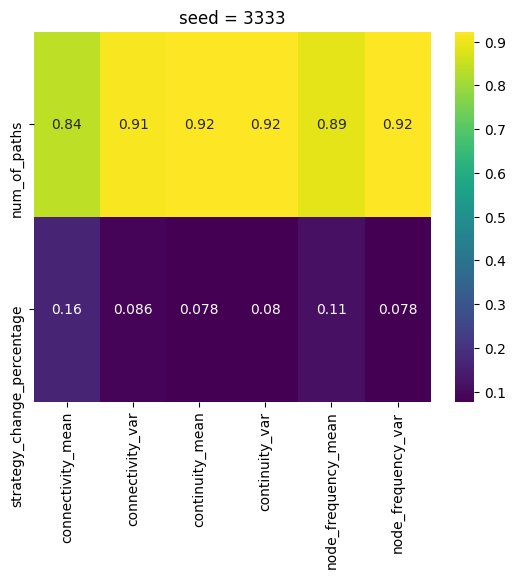

In [110]:
fs = feature_scoring.get_feature_scores_all(bounded_1_to_2_experiments3333[['num_of_paths', 'strategy_change_percentage']], bounded_1_to_2_outcomes3333)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 3333")
plt.savefig('bounded_ETRF_1_to_2_seed3333.png', bbox_inches='tight')

## Seed 4444

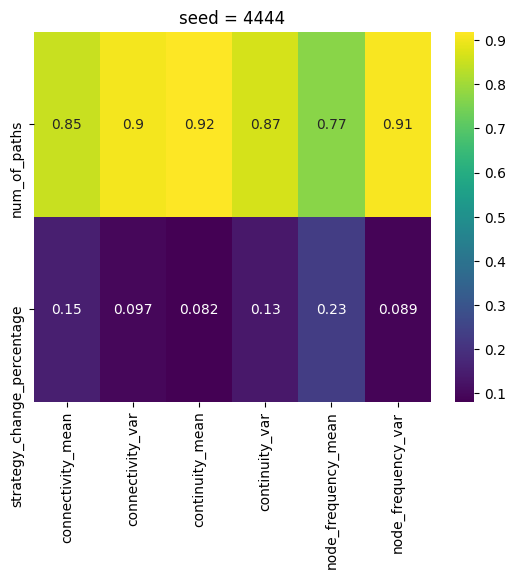

In [111]:
fs = feature_scoring.get_feature_scores_all(bounded_1_to_2_experiments4444[['num_of_paths', 'strategy_change_percentage']], bounded_1_to_2_outcomes4444)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 4444")
plt.savefig('bounded_ETRF_1_to_2_seed4444.png', bbox_inches='tight')

## Seed 5555

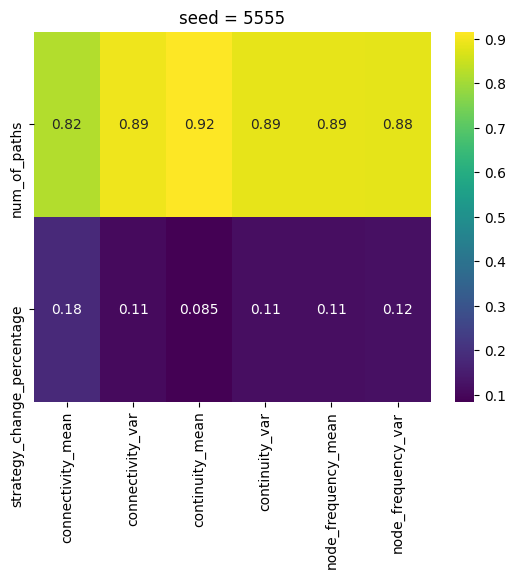

In [112]:
fs = feature_scoring.get_feature_scores_all(bounded_1_to_2_experiments5555[['num_of_paths', 'strategy_change_percentage']], bounded_1_to_2_outcomes5555)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 5555")
plt.savefig('bounded_ETRF_1_to_2_seed5555.png', bbox_inches='tight')

## Seed 6666

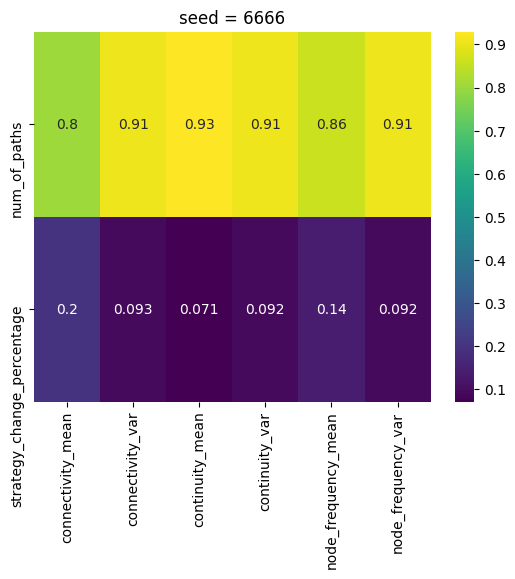

In [113]:
fs = feature_scoring.get_feature_scores_all(bounded_1_to_2_experiments6666[['num_of_paths', 'strategy_change_percentage']], bounded_1_to_2_outcomes6666)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 6666")
plt.savefig('bounded_ETRF_1_to_2_seed6666.png', bbox_inches='tight')

## Combined results for strategy 1 to 2

In [51]:
outcomes_combined_1_to_2 = {}
outcomes_combined_1_to_2['continuity_mean'] = np.concatenate((bounded_1_to_2_outcomes2222['continuity_mean'], bounded_1_to_2_outcomes3333['continuity_mean'], bounded_1_to_2_outcomes4444['continuity_mean'], bounded_1_to_2_outcomes5555['continuity_mean'], bounded_1_to_2_outcomes6666['continuity_mean']))
outcomes_combined_1_to_2['continuity_var'] = np.concatenate((bounded_1_to_2_outcomes2222['continuity_var'], bounded_1_to_2_outcomes3333['continuity_var'], bounded_1_to_2_outcomes4444['continuity_var'], bounded_1_to_2_outcomes5555['continuity_var'], bounded_1_to_2_outcomes6666['continuity_var']))
outcomes_combined_1_to_2['connectivity_mean'] = np.concatenate((bounded_1_to_2_outcomes2222['connectivity_mean'], bounded_1_to_2_outcomes3333['connectivity_mean'], bounded_1_to_2_outcomes4444['connectivity_mean'], bounded_1_to_2_outcomes5555['connectivity_mean'], bounded_1_to_2_outcomes6666['connectivity_mean']))
outcomes_combined_1_to_2['connectivity_var'] = np.concatenate((bounded_1_to_2_outcomes2222['connectivity_var'], bounded_1_to_2_outcomes3333['connectivity_var'], bounded_1_to_2_outcomes4444['connectivity_var'], bounded_1_to_2_outcomes5555['connectivity_var'], bounded_1_to_2_outcomes6666['connectivity_var']))
outcomes_combined_1_to_2['node_frequency_mean'] = np.concatenate((bounded_1_to_2_outcomes2222['node_frequency_mean'], bounded_1_to_2_outcomes3333['node_frequency_mean'], bounded_1_to_2_outcomes4444['node_frequency_mean'], bounded_1_to_2_outcomes5555['node_frequency_mean'], bounded_1_to_2_outcomes6666['node_frequency_mean']))
outcomes_combined_1_to_2['node_frequency_var'] = np.concatenate((bounded_1_to_2_outcomes2222['node_frequency_var'], bounded_1_to_2_outcomes3333['node_frequency_var'], bounded_1_to_2_outcomes4444['node_frequency_var'], bounded_1_to_2_outcomes5555['node_frequency_var'], bounded_1_to_2_outcomes6666['node_frequency_var']))


In [52]:
bounded_1_to_2_experiments2222['seed']=2222
bounded_1_to_2_experiments3333['seed']=3333
bounded_1_to_2_experiments4444['seed']=4444
bounded_1_to_2_experiments5555['seed']=5555
bounded_1_to_2_experiments6666['seed']=6666


In [54]:
bounded_1_to_2_experiments_combined = pd.concat([bounded_1_to_2_experiments2222, bounded_1_to_2_experiments3333, bounded_1_to_2_experiments4444, bounded_1_to_2_experiments5555, bounded_1_to_2_experiments6666], ignore_index=True, sort=False)

## plotting results

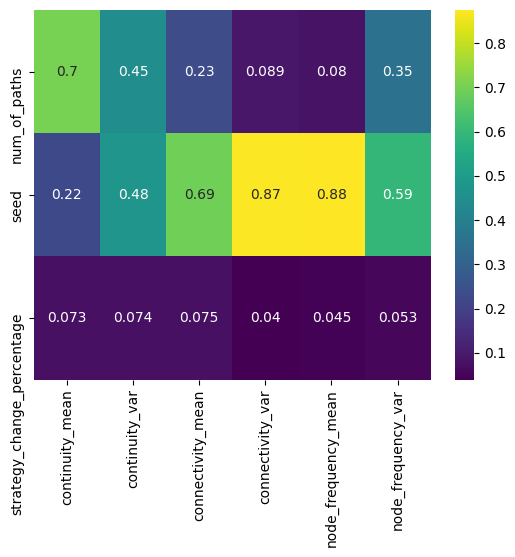

In [114]:
fs = feature_scoring.get_feature_scores_all(bounded_1_to_2_experiments_combined[['num_of_paths', 'strategy_change_percentage', 'seed']], outcomes_combined_1_to_2)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_1_to_2_allseeds.png', bbox_inches='tight')

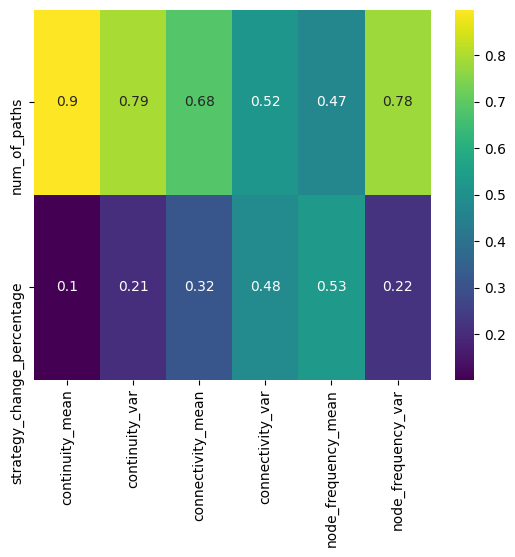

In [115]:
fs = feature_scoring.get_feature_scores_all(bounded_1_to_2_experiments_combined[['num_of_paths', 'strategy_change_percentage']], outcomes_combined_1_to_2)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_1_to_2_allseeds_noseed.png', bbox_inches='tight')

In [100]:
outcomes_combined_1_to_2_pd = pd.DataFrame.from_dict(outcomes_combined_1_to_2)
bounded_1_to_2_experiments_combined_with_outcomes = bounded_1_to_2_experiments_combined.copy()
for column in outcomes_combined_1_to_2_pd.columns:
    bounded_1_to_2_experiments_combined_with_outcomes[column] = outcomes_combined_1_to_2_pd[column]


In [101]:
bounded_1_to_2_experiments_combined_with_outcomes.columns

Index(['num_of_paths', 'strategy_change_percentage', 'scenario', 'policy',
       'model', 'seed', 'continuity_mean', 'continuity_var',
       'connectivity_mean', 'connectivity_var', 'node_frequency_mean',
       'node_frequency_var'],
      dtype='object')

C:\Users\Willemijn Tutuarima\miniconda3\envs\gds\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


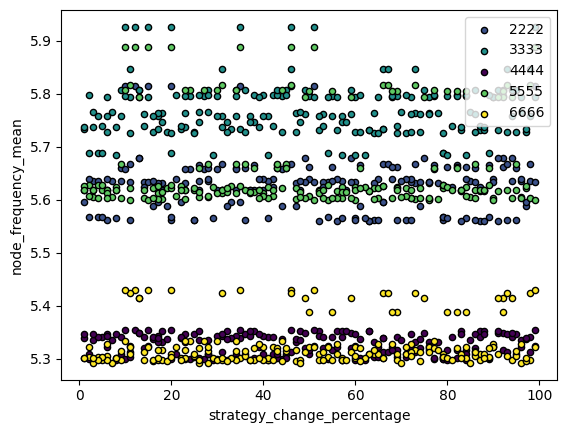

In [116]:
fig, ax = plt.subplots()
colors = {2222:'#3b528b', 3333:'#21918c', 4444:'#440154', 5555:'#5ec962', 6666:'#fde725'}

grouped = bounded_1_to_2_experiments_combined_with_outcomes.groupby('seed')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='strategy_change_percentage', y='node_frequency_mean', label=key, color=colors[key], edgecolor='black')
plt.savefig('bounded_1_to_2_scatter_nf_mean_strategy_percentage.png', bbox_inches='tight')

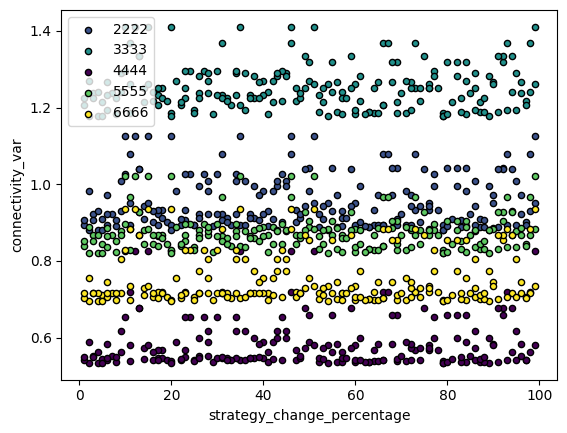

In [118]:
fig, ax = plt.subplots()
colors = {2222:'#3b528b', 3333:'#21918c', 4444:'#440154', 5555:'#5ec962', 6666:'#fde725'}

grouped = bounded_1_to_2_experiments_combined_with_outcomes.groupby('seed')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='strategy_change_percentage', y='connectivity_var', label=key, color=colors[key], edgecolor='black')

plt.savefig('bounded_1_to_2_scatter_conn_var_strategy_percentage.png', bbox_inches='tight')

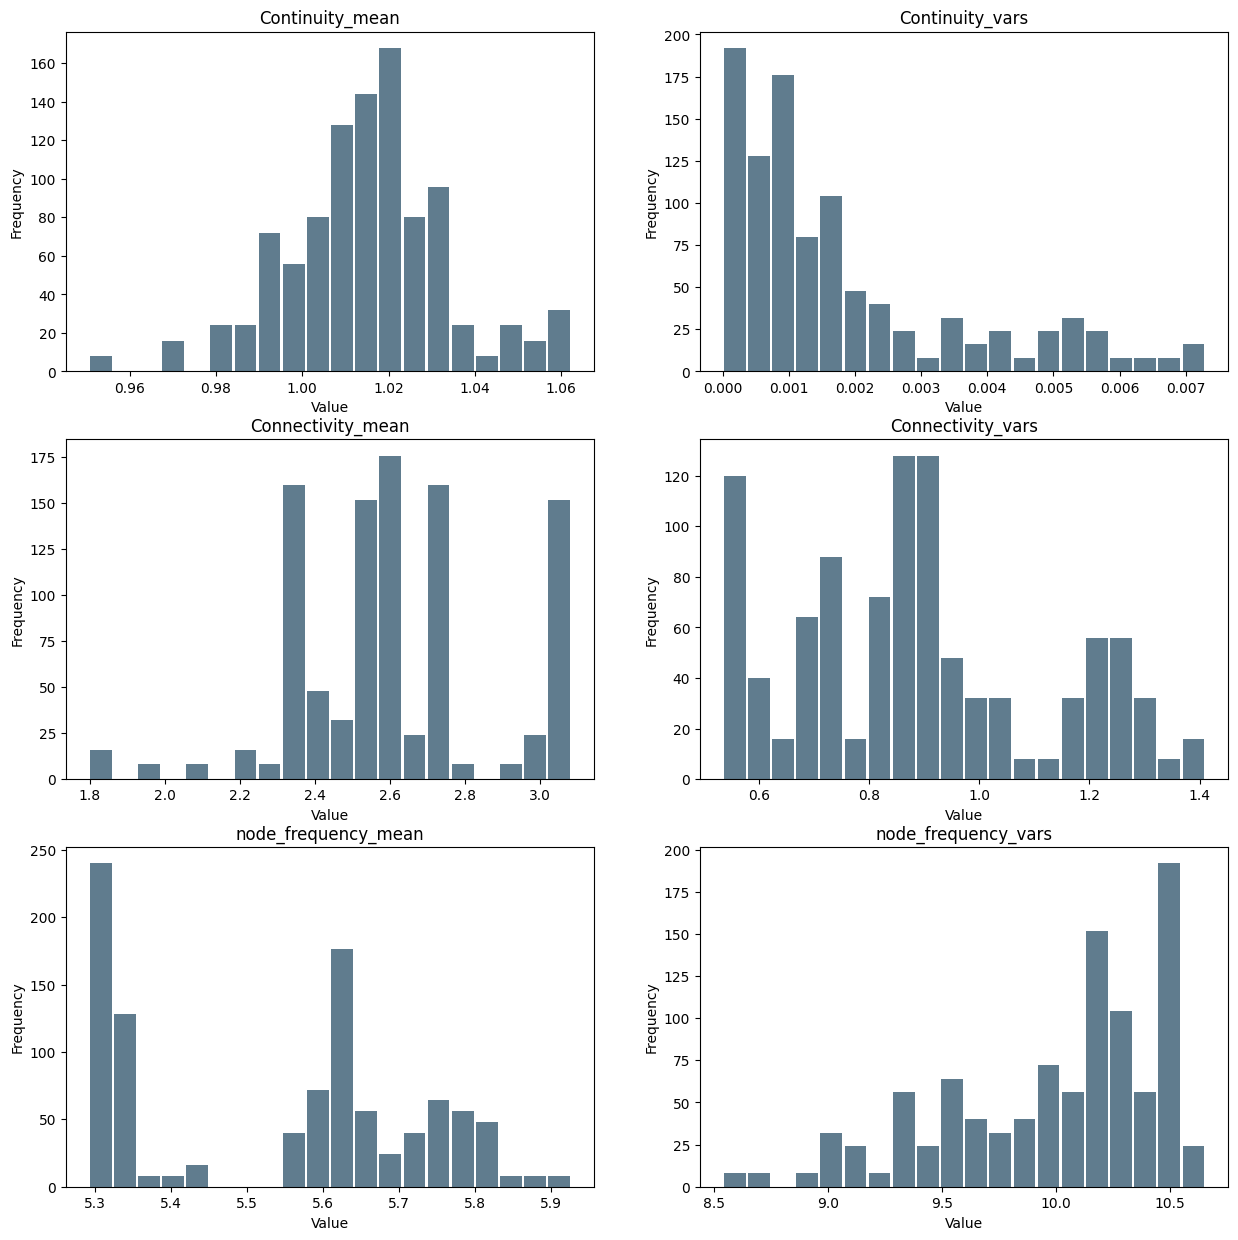

In [57]:
make_histogram_full(outcomes_combined_1_to_2)

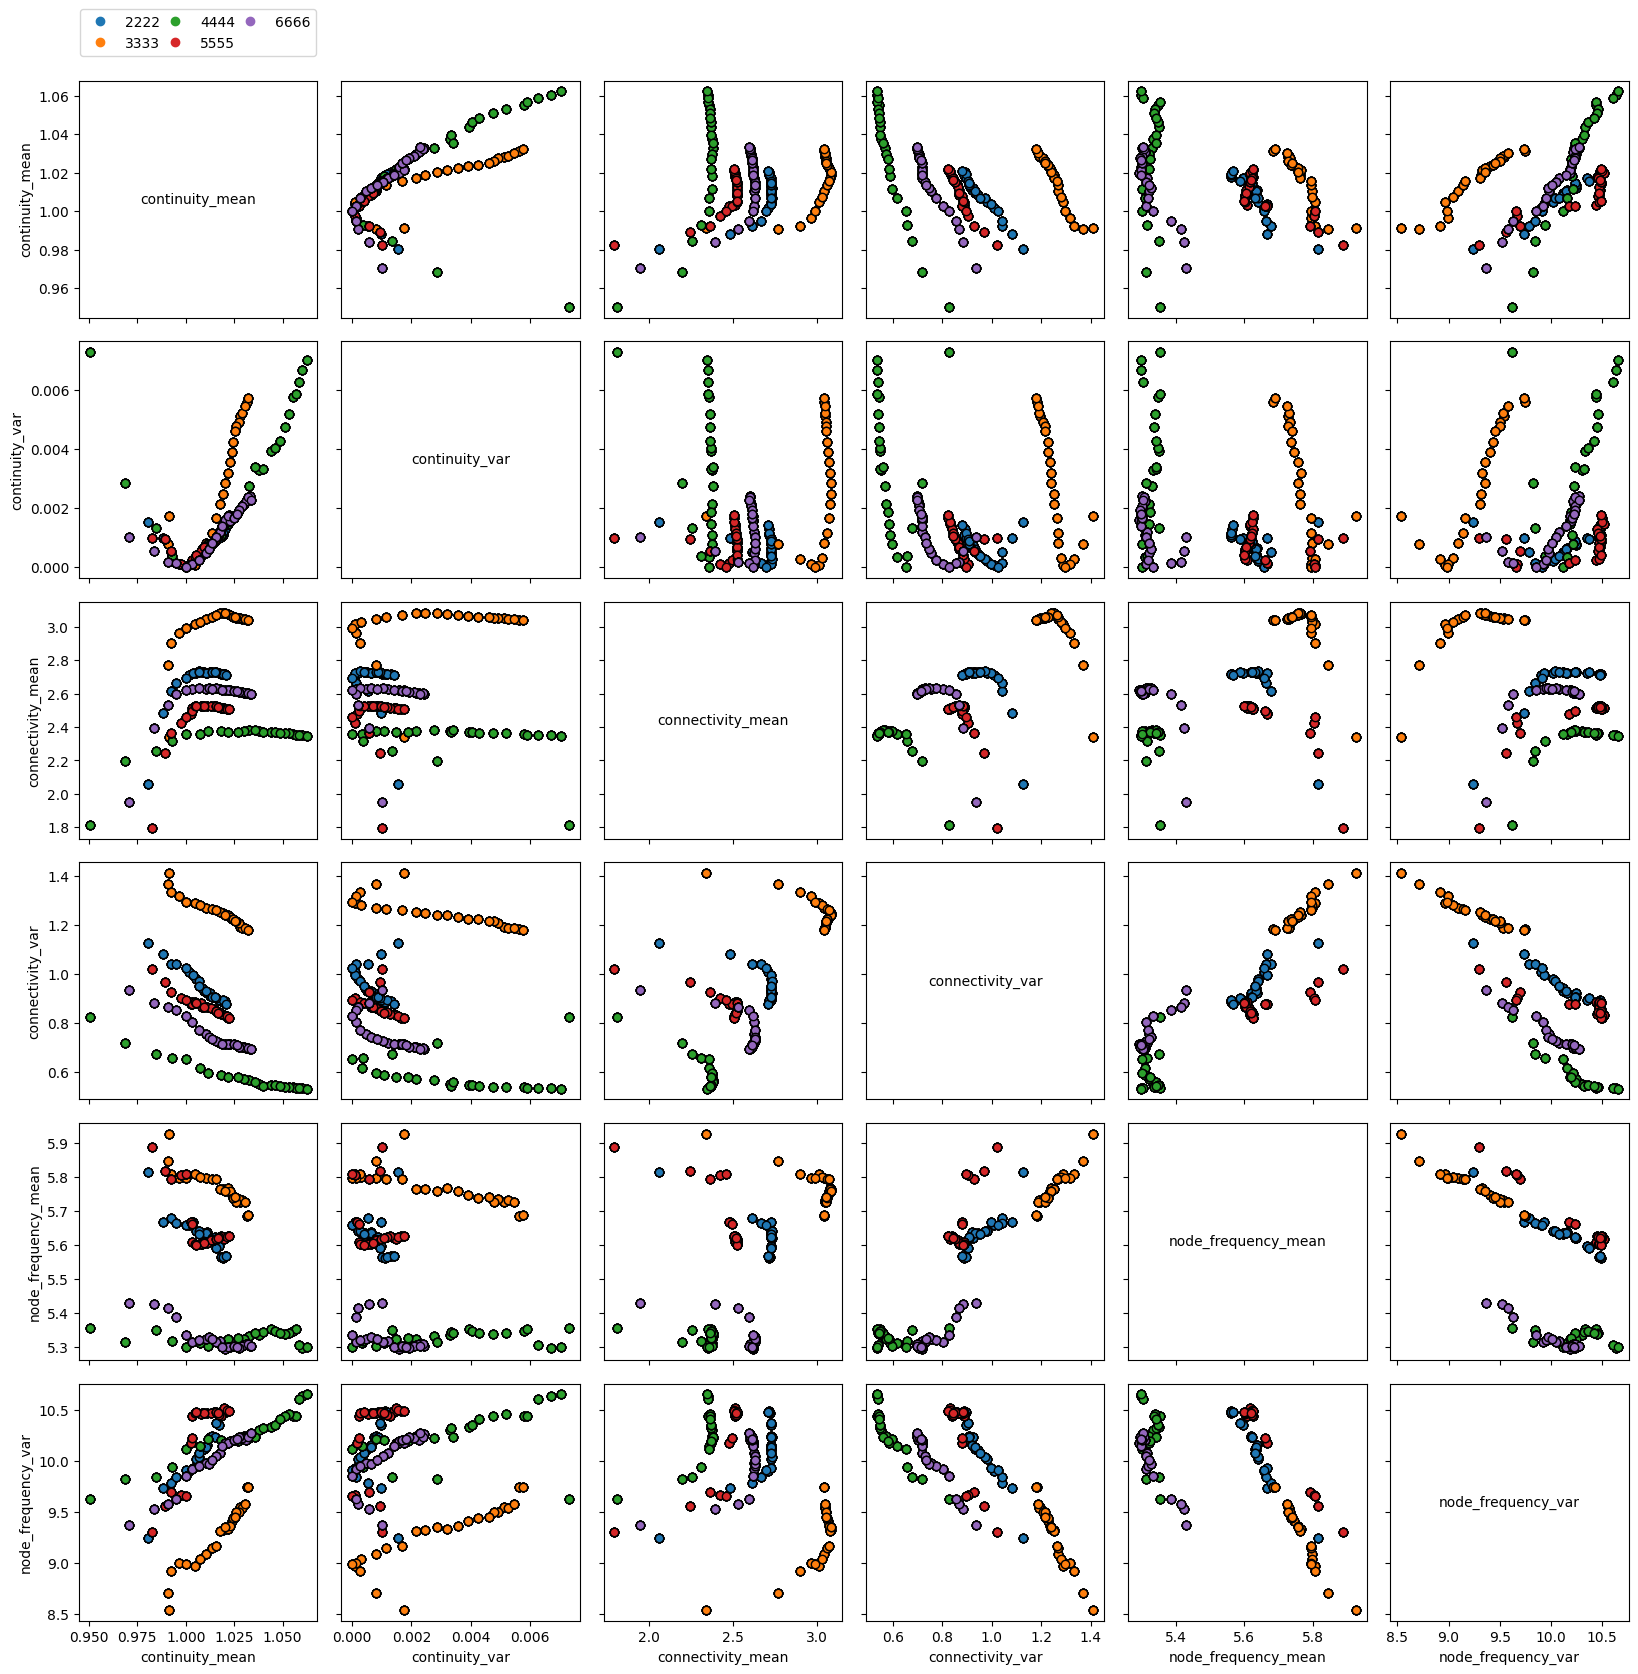

In [58]:
fig, axes = pairs_plotting.pairs_scatter(bounded_1_to_2_experiments_combined, outcomes_combined_1_to_2, group_by='seed', grouping_specifiers = {2222: 2222, 3333:3333, 4444:4444, 5555:5555, 6666:6666}, legend=True)
fig.set_size_inches(20, 20)
plt.show()

### Correlation matrix

In [59]:
import scipy.stats

In [61]:
corr_mat = pd.DataFrame(columns=['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var'])
p_mat = pd.DataFrame()
for value1 in ['num_of_paths', 'strategy_change_percentage']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_1_to_2_experiments_combined[value1], outcomes_combined_1_to_2[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_1_to_2_experiments_combined[value1], outcomes_combined_1_to_2[value2])[1]
    

In [62]:
corr_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,0.713737,0.480375,0.099948,-0.234786,-0.195436,0.484524
strategy_change_percentage,-0.03262,-0.030321,0.003144,0.0061,0.00868,-0.01693


In [64]:
corr_mat.to_excel('corr_mat_bounded_run_1_to_2_exp_to_outcomes.xlsx')

In [63]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,3.914715e-239,1.958383e-109,0.000004,1.612969e-27,1.460187e-19,1.961976e-111
strategy_change_percentage,1.258395e-01,1.547878e-01,0.882646,7.745614e-01,6.835838e-01,4.266360e-01


In [65]:
p_mat.to_excel('p_mat_bounded_run_1_to_2_exp_to_outcomes.xlsx')

In [67]:
corr_mat = pd.DataFrame()
p_mat = pd.DataFrame()
for value1 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(outcomes_combined_1_to_2[value1], outcomes_combined_1_to_2[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(outcomes_combined_1_to_2[value1], outcomes_combined_1_to_2[value2])[1]
 

In [68]:
corr_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
continuity_mean,1.000000,0.675969,0.006972,-0.372886,-0.268044,0.361265
continuity_var,0.675969,1.000000,-0.100968,-0.265462,-0.154422,0.151065
connectivity_mean,0.006972,-0.100968,1.000000,0.534968,0.312516,-0.296258
connectivity_var,-0.372886,-0.265462,0.534968,1.000000,0.677935,-0.523871
node_frequency_mean,-0.268044,-0.154422,0.312516,0.677935,1.000000,-0.384000
node_frequency_var,0.361265,0.151065,-0.296258,-0.523871,-0.384000,1.000000


In [70]:
corr_mat.to_excel('corr_mat_bounded_run_1_to_2_outcomes_to_outcomes.xlsx')

In [69]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
continuity_mean,0.000000e+00,3.487796e-221,7.431732e-01,9.493107e-69,2.207795e-36,1.208469e-64
continuity_var,3.487796e-221,0.000000e+00,2.085920e-06,1.020439e-35,3.959697e-13,1.255063e-12
connectivity_mean,7.431732e-01,2.085920e-06,0.000000e+00,1.222356e-139,6.896068e-49,4.109885e-44
connectivity_var,9.493107e-69,1.020439e-35,1.222356e-139,0.000000e+00,5.299755e-223,5.468255e-134
node_frequency_mean,2.207795e-36,3.959697e-13,6.896068e-49,5.299755e-223,0.000000e+00,6.973695e-73
node_frequency_var,1.208469e-64,1.255063e-12,4.109885e-44,5.468255e-134,6.973695e-73,0.000000e+00


In [71]:
p_mat.to_excel('p_mat_bounded_run_1_to_2_outcomes_to_outcomes.xlsx')

# Strategy 2 to 1

## Seed 2222

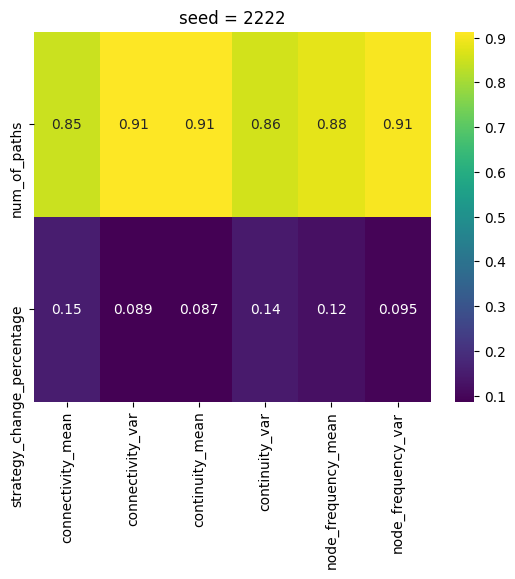

In [119]:
fs = feature_scoring.get_feature_scores_all(bounded_2_to_1_experiments2222[['num_of_paths', 'strategy_change_percentage']], bounded_2_to_1_outcomes2222)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 2222")
plt.savefig('bounded_ETRF_2_to_1_seed2222.png', bbox_inches='tight')

## Seed 3333

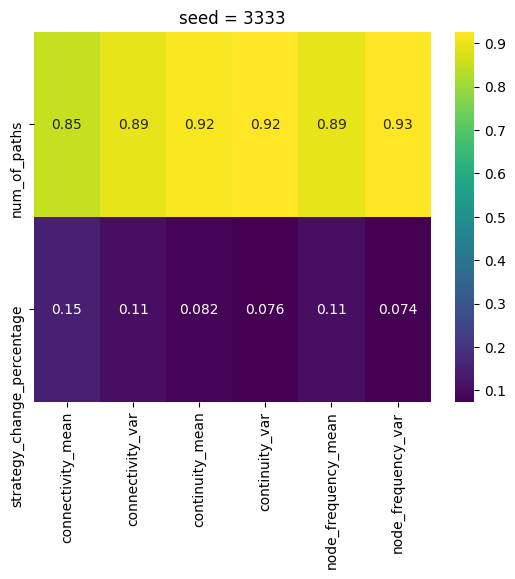

In [120]:
fs = feature_scoring.get_feature_scores_all(bounded_2_to_1_experiments3333[['num_of_paths', 'strategy_change_percentage']], bounded_2_to_1_outcomes3333)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 3333")
plt.savefig('bounded_ETRF_2_to_1_seed3333.png', bbox_inches='tight')

## Seed 4444

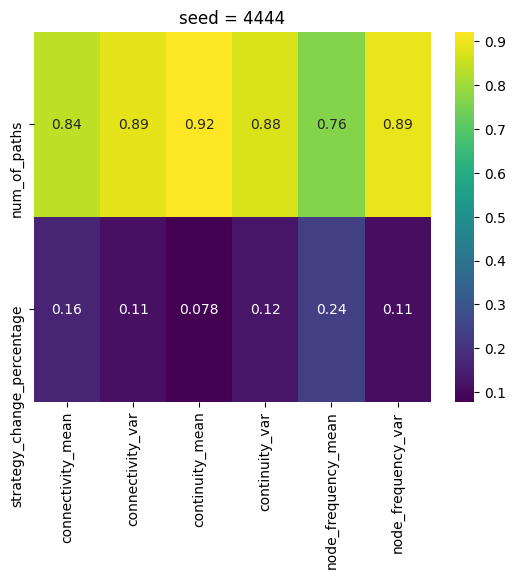

In [121]:
fs = feature_scoring.get_feature_scores_all(bounded_2_to_1_experiments4444[['num_of_paths', 'strategy_change_percentage']], bounded_2_to_1_outcomes4444)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 4444")
plt.savefig('bounded_ETRF_2_to_1_seed4444.png', bbox_inches='tight')

## Seed 5555

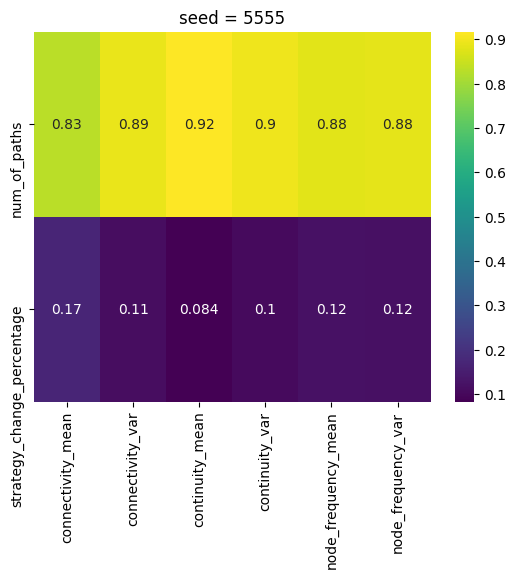

In [122]:
fs = feature_scoring.get_feature_scores_all(bounded_2_to_1_experiments5555[['num_of_paths', 'strategy_change_percentage']], bounded_2_to_1_outcomes5555)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 5555")
plt.savefig('bounded_ETRF_2_to_1_seed5555.png', bbox_inches='tight')

## Seed 6666

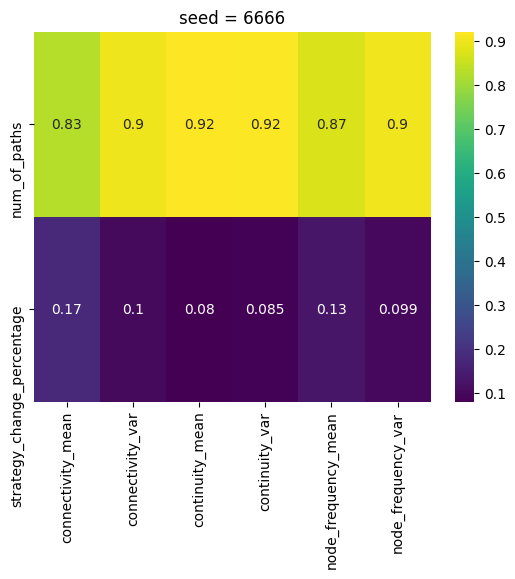

In [123]:
fs = feature_scoring.get_feature_scores_all(bounded_2_to_1_experiments6666[['num_of_paths', 'strategy_change_percentage']], bounded_2_to_1_outcomes6666)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 6666")
plt.savefig('bounded_ETRF_2_to_1_seed6666.png', bbox_inches='tight')

## Combined results strategy 2 to 1

In [78]:
outcomes_combined_2_to_1 = {}
outcomes_combined_2_to_1['continuity_mean'] = np.concatenate((bounded_2_to_1_outcomes2222['continuity_mean'], bounded_2_to_1_outcomes3333['continuity_mean'], bounded_2_to_1_outcomes4444['continuity_mean'], bounded_2_to_1_outcomes5555['continuity_mean'], bounded_2_to_1_outcomes6666['continuity_mean']))
outcomes_combined_2_to_1['continuity_var'] = np.concatenate((bounded_2_to_1_outcomes2222['continuity_var'], bounded_2_to_1_outcomes3333['continuity_var'], bounded_2_to_1_outcomes4444['continuity_var'], bounded_2_to_1_outcomes5555['continuity_var'], bounded_2_to_1_outcomes6666['continuity_var']))
outcomes_combined_2_to_1['connectivity_mean'] = np.concatenate((bounded_2_to_1_outcomes2222['connectivity_mean'], bounded_2_to_1_outcomes3333['connectivity_mean'], bounded_2_to_1_outcomes4444['connectivity_mean'], bounded_2_to_1_outcomes5555['connectivity_mean'], bounded_2_to_1_outcomes6666['connectivity_mean']))
outcomes_combined_2_to_1['connectivity_var'] = np.concatenate((bounded_2_to_1_outcomes2222['connectivity_var'], bounded_2_to_1_outcomes3333['connectivity_var'], bounded_2_to_1_outcomes4444['connectivity_var'], bounded_2_to_1_outcomes5555['connectivity_var'], bounded_2_to_1_outcomes6666['connectivity_var']))
outcomes_combined_2_to_1['node_frequency_mean'] = np.concatenate((bounded_2_to_1_outcomes2222['node_frequency_mean'], bounded_2_to_1_outcomes3333['node_frequency_mean'], bounded_2_to_1_outcomes4444['node_frequency_mean'], bounded_2_to_1_outcomes5555['node_frequency_mean'], bounded_2_to_1_outcomes6666['node_frequency_mean']))
outcomes_combined_2_to_1['node_frequency_var'] = np.concatenate((bounded_2_to_1_outcomes2222['node_frequency_var'], bounded_2_to_1_outcomes3333['node_frequency_var'], bounded_2_to_1_outcomes4444['node_frequency_var'], bounded_2_to_1_outcomes5555['node_frequency_var'], bounded_2_to_1_outcomes6666['node_frequency_var']))


In [80]:
bounded_2_to_1_experiments2222['seed']=2222
bounded_2_to_1_experiments3333['seed']=3333
bounded_2_to_1_experiments4444['seed']=4444
bounded_2_to_1_experiments5555['seed']=5555
bounded_2_to_1_experiments6666['seed']=6666


In [81]:
bounded_2_to_1_experiments_combined = pd.concat([bounded_2_to_1_experiments2222, bounded_2_to_1_experiments3333, bounded_2_to_1_experiments4444, bounded_2_to_1_experiments5555, bounded_2_to_1_experiments6666], ignore_index=True, sort=False)

## Plotting results

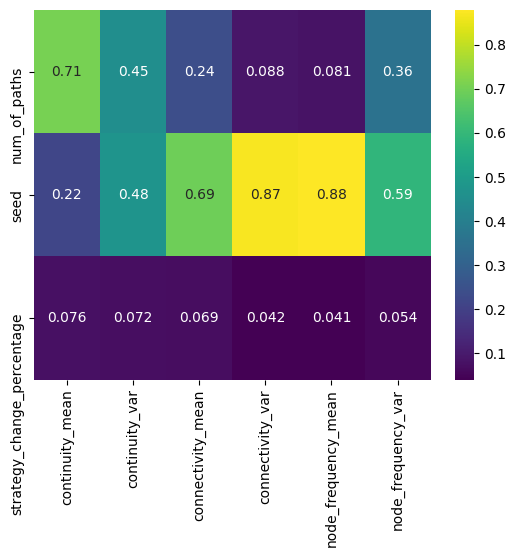

In [124]:
fs = feature_scoring.get_feature_scores_all(bounded_2_to_1_experiments_combined[['num_of_paths', 'strategy_change_percentage', 'seed']], outcomes_combined_2_to_1)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_2_to_1_allseeds.png', bbox_inches='tight')

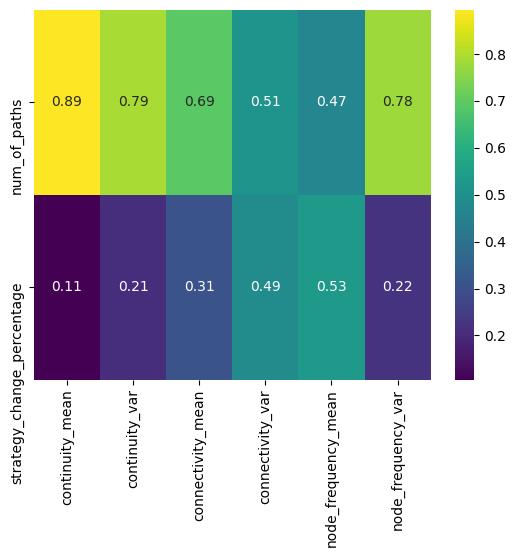

In [125]:
fs = feature_scoring.get_feature_scores_all(bounded_2_to_1_experiments_combined[['num_of_paths', 'strategy_change_percentage']], outcomes_combined_2_to_1)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_2_to_1_allseeds_noseed.png', bbox_inches='tight')

In [106]:
outcomes_combined_2_to_1_pd = pd.DataFrame.from_dict(outcomes_combined_2_to_1)
bounded_2_to_1_experiments_combined_with_outcomes = bounded_2_to_1_experiments_combined.copy()
for column in outcomes_combined_2_to_1_pd.columns:
    bounded_2_to_1_experiments_combined_with_outcomes[column] = outcomes_combined_2_to_1_pd[column]


C:\Users\Willemijn Tutuarima\miniconda3\envs\gds\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


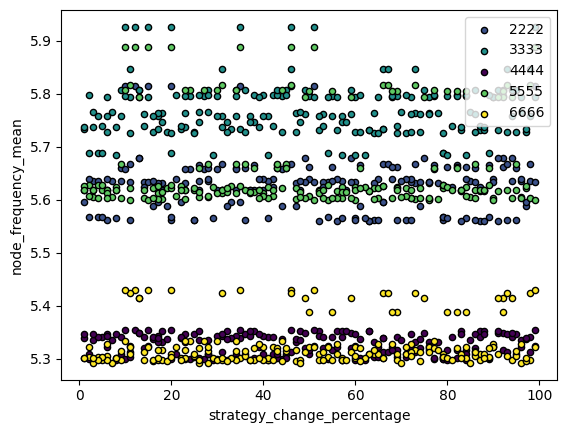

In [126]:
fig, ax = plt.subplots()
colors = {2222:'#3b528b', 3333:'#21918c', 4444:'#440154', 5555:'#5ec962', 6666:'#fde725'}

grouped = bounded_2_to_1_experiments_combined_with_outcomes.groupby('seed')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='strategy_change_percentage', y='node_frequency_mean', label=key, color=colors[key], edgecolor='black')
plt.savefig('bounded_2_to_1_scatter_nf_mean_strategy_percentage.png', bbox_inches='tight')

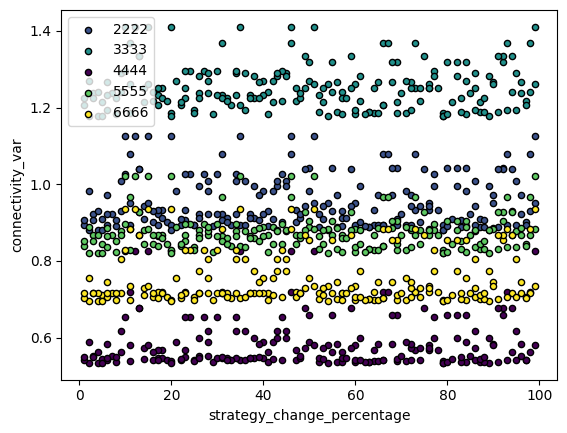

In [127]:
fig, ax = plt.subplots()
colors = {2222:'#3b528b', 3333:'#21918c', 4444:'#440154', 5555:'#5ec962', 6666:'#fde725'}

grouped = bounded_2_to_1_experiments_combined_with_outcomes.groupby('seed')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='strategy_change_percentage', y='connectivity_var', label=key, color=colors[key], edgecolor='black')
plt.savefig('bounded_2_to_1_scatter_conn_var_strategy_percentage.png', bbox_inches='tight')

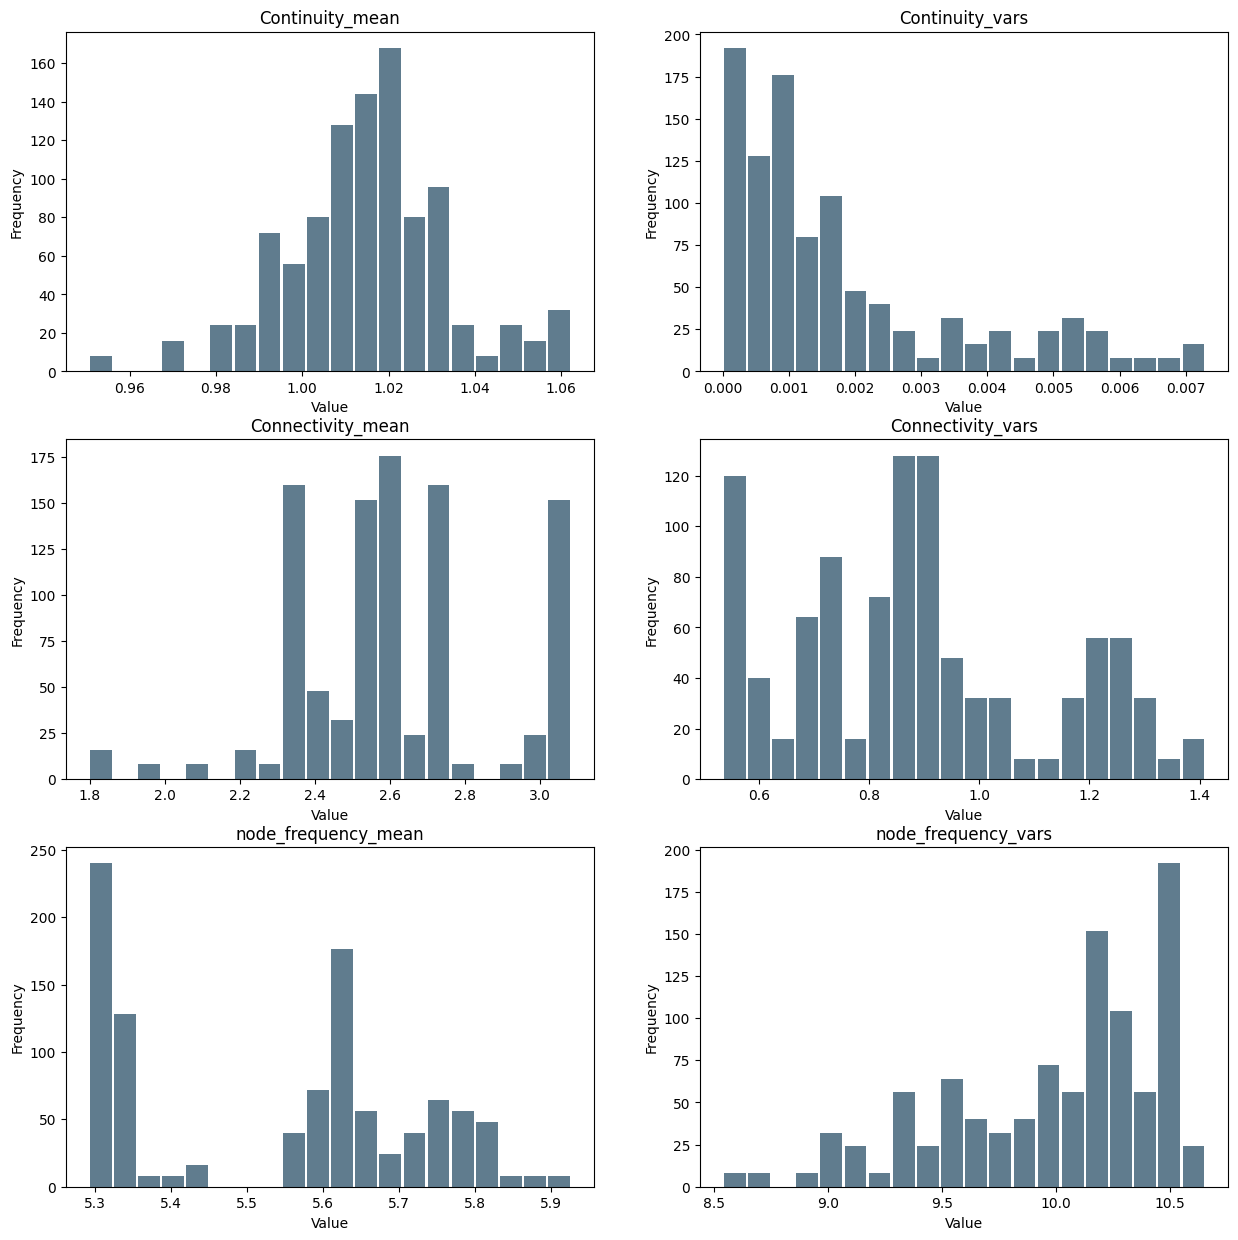

In [84]:
make_histogram_full(outcomes_combined_2_to_1)

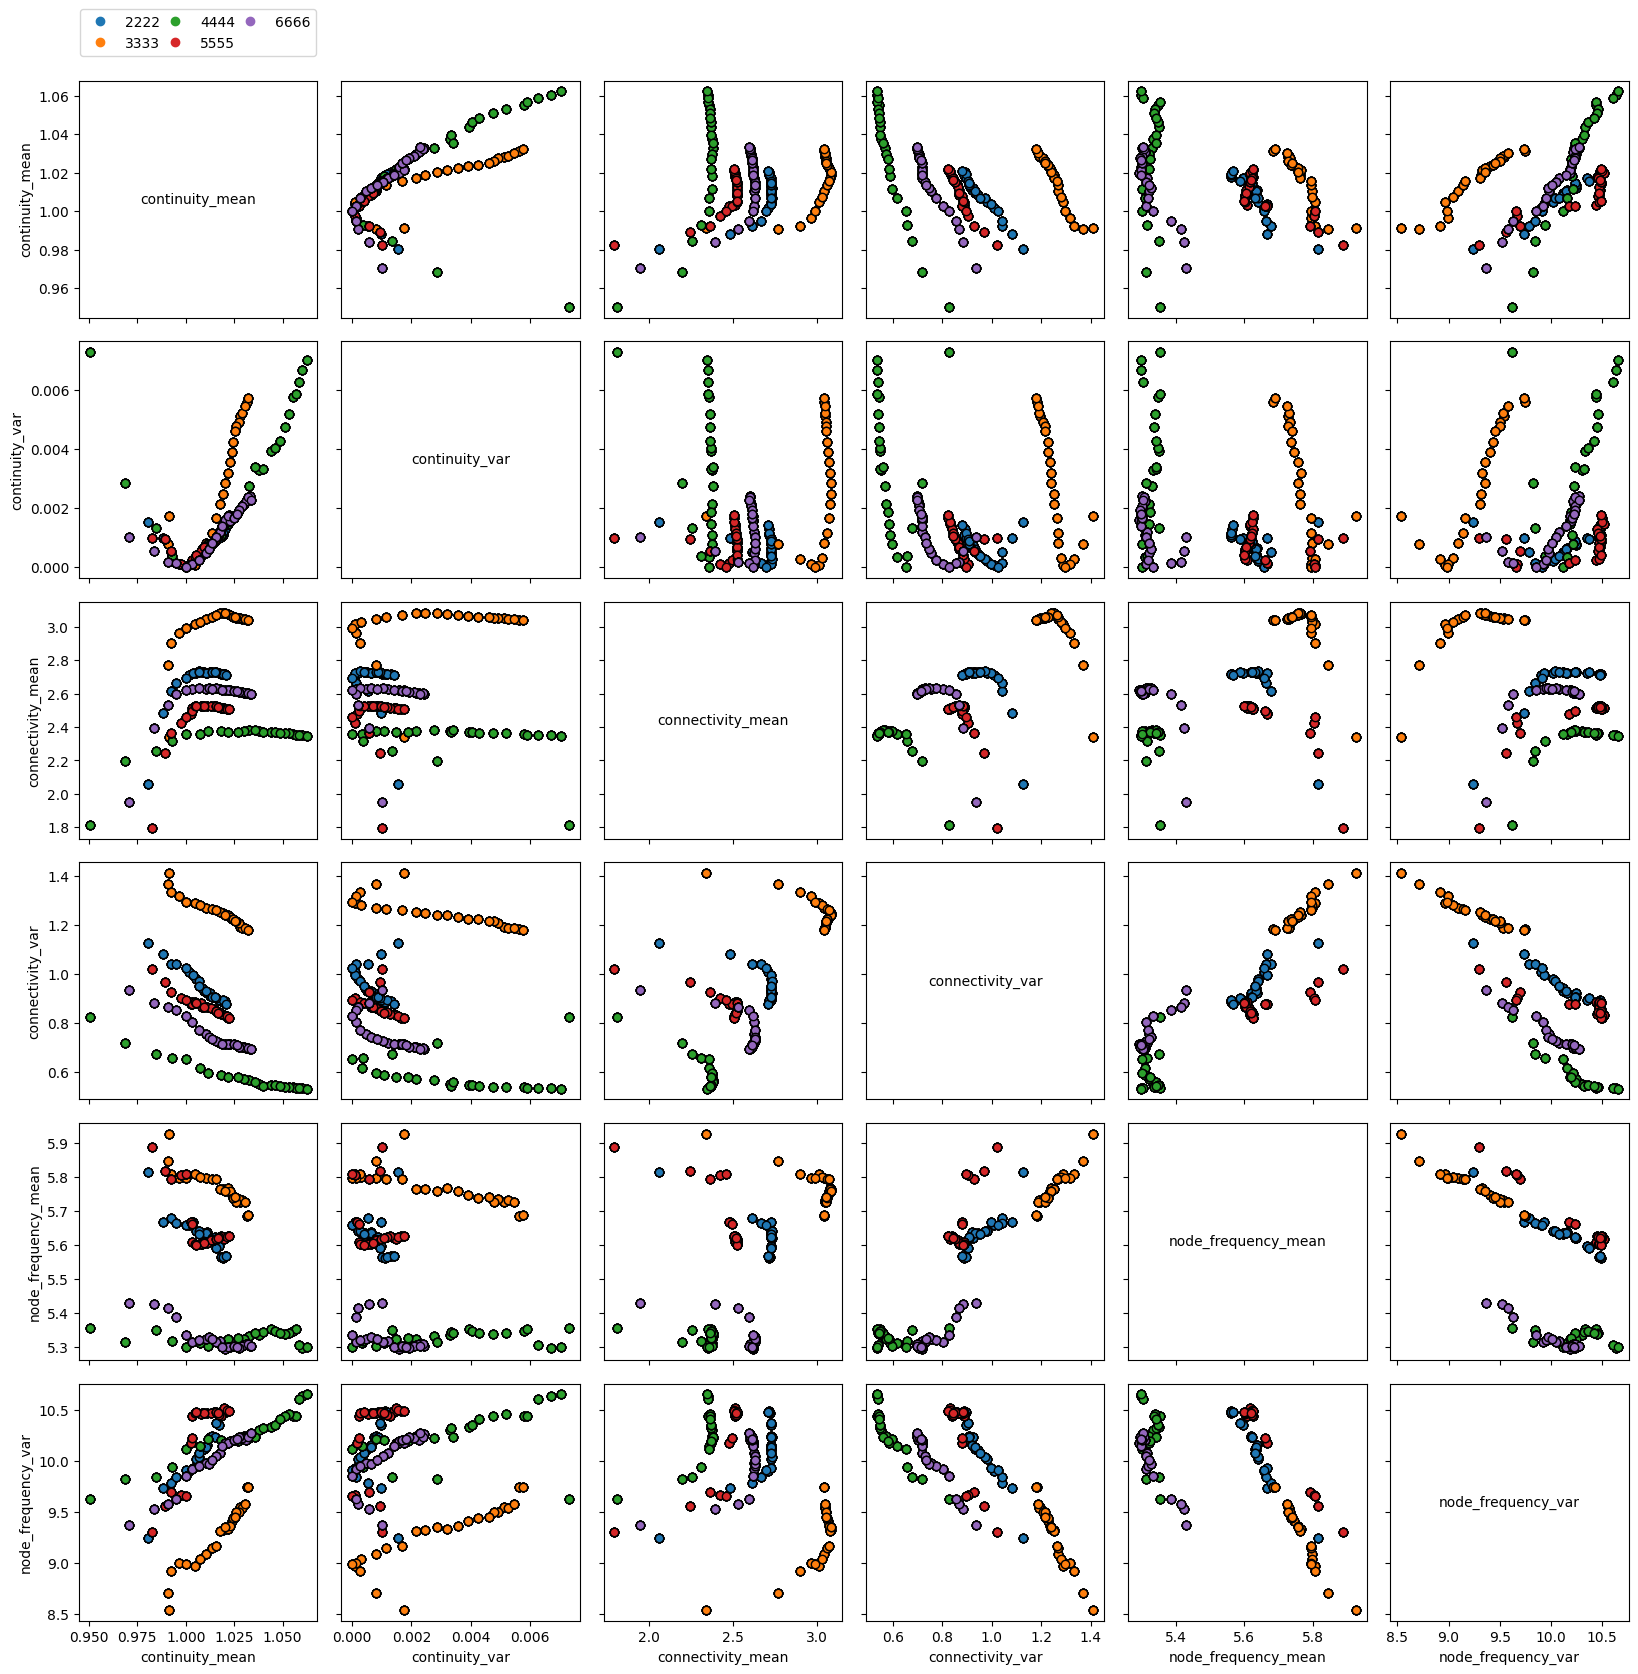

In [85]:
fig, axes = pairs_plotting.pairs_scatter(bounded_2_to_1_experiments_combined, outcomes_combined_2_to_1, group_by='seed', grouping_specifiers = {2222: 2222, 3333:3333, 4444:4444, 5555:5555, 6666:6666}, legend=True)
fig.set_size_inches(20, 20)
plt.show()

### Correlation matrix

In [86]:
corr_mat = pd.DataFrame(columns=['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var'])
p_mat = pd.DataFrame()
for value1 in ['num_of_paths', 'strategy_change_percentage']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_2_to_1_experiments_combined[value1], outcomes_combined_2_to_1[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_2_to_1_experiments_combined[value1], outcomes_combined_2_to_1[value2])[1]
  

In [87]:
corr_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,0.713737,0.480375,0.099948,-0.234786,-0.195436,0.484524
strategy_change_percentage,-0.03262,-0.030321,0.003144,0.0061,0.00868,-0.01693


In [88]:
corr_mat.to_excel('corr_mat_bounded_run_2_to_1_exp_to_outcomes.xlsx')

In [89]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,3.914715e-239,1.958383e-109,0.000004,1.612969e-27,1.460187e-19,1.961976e-111
strategy_change_percentage,1.258395e-01,1.547878e-01,0.882646,7.745614e-01,6.835838e-01,4.266360e-01


In [90]:
p_mat.to_excel('p_mat_bounded_run_2_to_1_exp_to_outcomes.xlsx')

In [91]:
corr_mat = pd.DataFrame()
p_mat = pd.DataFrame()
for value1 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(outcomes_combined_2_to_1[value1], outcomes_combined_2_to_1[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(outcomes_combined_2_to_1[value1], outcomes_combined_2_to_1[value2])[1]
 

In [92]:
corr_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
continuity_mean,1.000000,0.675969,0.006972,-0.372886,-0.268044,0.361265
continuity_var,0.675969,1.000000,-0.100968,-0.265462,-0.154422,0.151065
connectivity_mean,0.006972,-0.100968,1.000000,0.534968,0.312516,-0.296258
connectivity_var,-0.372886,-0.265462,0.534968,1.000000,0.677935,-0.523871
node_frequency_mean,-0.268044,-0.154422,0.312516,0.677935,1.000000,-0.384000
node_frequency_var,0.361265,0.151065,-0.296258,-0.523871,-0.384000,1.000000


In [93]:
corr_mat.to_excel('corr_mat_bounded_run_2_to_1_outcomes_to_outcomes.xlsx')

In [94]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
continuity_mean,0.000000e+00,3.487796e-221,7.431732e-01,9.493107e-69,2.207795e-36,1.208469e-64
continuity_var,3.487796e-221,0.000000e+00,2.085920e-06,1.020439e-35,3.959697e-13,1.255063e-12
connectivity_mean,7.431732e-01,2.085920e-06,0.000000e+00,1.222356e-139,6.896068e-49,4.109885e-44
connectivity_var,9.493107e-69,1.020439e-35,1.222356e-139,0.000000e+00,5.299755e-223,5.468255e-134
node_frequency_mean,2.207795e-36,3.959697e-13,6.896068e-49,5.299755e-223,0.000000e+00,6.973695e-73
node_frequency_var,1.208469e-64,1.255063e-12,4.109885e-44,5.468255e-134,6.973695e-73,0.000000e+00


In [95]:
p_mat.to_excel('p_mat_bounded_run_2_to_1_outcomes_to_outcomes.xlsx')